In [24]:
#Parte 2 abaixo (Lucas)

Start: (1.0, 10.0), End: (10.0, 1.0), Obstáculos: 3
Grafo gerado com 15 nós e 46 arestas.


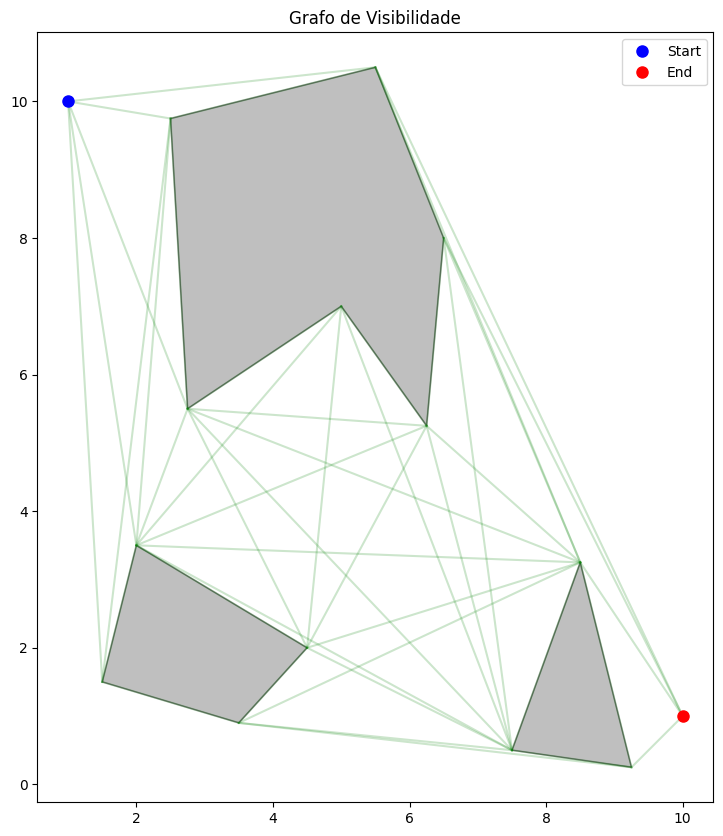

In [25]:
import math
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, LineString
import networkx as nx
import os

def ler_mapa(nome_arquivo): #Lê o arquivo de mapa e retorna as posições inicial, final e a lista de polígonos.

    obstaculos = []
    # Adiciona .txt se não estiver presente no nome, para garantir
    if not nome_arquivo.endswith('.txt'):
         caminho_arquivo = nome_arquivo + '.txt'
         # Se não encontrar com .txt, tenta sem a extensão (caso o arquivo realmente não tenha)
         if not os.path.exists(caminho_arquivo):
             caminho_arquivo = nome_arquivo
    else:
        caminho_arquivo = nome_arquivo

    try:
        with open(caminho_arquivo, 'r') as f:
            line = f.readline()
            if not line: return None, None, []
            start_pos = tuple(map(float, line.strip().split(',')))

            line = f.readline()
            if not line: return None, None, []
            end_pos = tuple(map(float, line.strip().split(',')))

            line = f.readline()
            if not line: return start_pos, end_pos, []
            num_obstaculos = int(line.strip())

            for _ in range(num_obstaculos):
                line = f.readline()
                if not line: break
                num_quinas = int(line.strip())
                coords = []
                for _ in range(num_quinas):
                    line = f.readline()
                    if not line: break
                    coords.append(tuple(map(float, line.strip().split(','))))
                obstaculos.append(Polygon(coords))
    except FileNotFoundError:
        print(f"Erro: Arquivo '{caminho_arquivo}' não encontrado.")
        return None, None, []
    except ValueError as e:
         print(f"Erro ao ler o arquivo: {e}. Verifique a formatação.")
         return None, None, []

    return start_pos, end_pos, obstaculos

def gerar_grafo_visibilidade(start_pos, end_pos, obstaculos): #Gera o grafo de visibilidade considerando obstáculos.

    G = nx.Graph()
    pontos = [start_pos, end_pos]
    for poly in obstaculos:
        pontos.extend(list(poly.exterior.coords)[:-1])

    G.add_nodes_from(pontos)

    for i in range(len(pontos)):
        for j in range(i + 1, len(pontos)):
            # CORREÇÃO AQUI: 'points' -> 'pontos'
            p1 = pontos[i]
            p2 = pontos[j]
            line = LineString([p1, p2])

            visivel = True
            for poly in obstaculos:
                 if line.intersects(poly) and not line.touches(poly):
                     if line.intersection(poly).length > 1e-9:
                         visivel = False
                         break

            if visivel:
                dist = math.dist(p1, p2)
                G.add_edge(p1, p2, weight=dist)
    return G

def plotar_mapa_e_grafo(start_pos, end_pos, obstaculos, G): #Função auxiliar para visualizar o mapa e o grafo gerado (DEBUG).

    fig, ax = plt.subplots(figsize=(10, 10))

    for poly in obstaculos:
        x, y = poly.exterior.xy
        ax.fill(x, y, alpha=0.5, fc='gray', ec='black')

    for u, v in G.edges():
        ax.plot([u[0], v[0]], [u[1], v[1]], 'g-', alpha=0.2)

    ax.plot(start_pos[0], start_pos[1], 'bo', markersize=8, label='Start')
    ax.plot(end_pos[0], end_pos[1], 'ro', markersize=8, label='End')

    ax.set_aspect('equal')
    plt.legend()
    plt.title("Grafo de Visibilidade")
    plt.show()

# Certifique-se de que o arquivo 'mapa.txt' existe na pasta.
# Se você salvou como 'mapa.txt', use: ler_mapa("mapa") ou ler_mapa("mapa.txt")
start, end, obst = ler_mapa("mapa")

if start:
    print(f"Start: {start}, End: {end}, Obstáculos: {len(obst)}")
    grafo_vis = gerar_grafo_visibilidade(start, end, obst)
    print(f"Grafo gerado com {grafo_vis.number_of_nodes()} nós e {grafo_vis.number_of_edges()} arestas.")

    # Descomente para ver o gráfico
    plotar_mapa_e_grafo(start, end, obst, grafo_vis)
else:
    print("Não foi possível gerar o grafo devido a erro na leitura do mapa.")


--- Passo 3: Gerando a Árvore Geradora Mínima (MST) ---
MST (Kruskal) gerada com 15 nós e 14 arestas.
Plotando a MST...


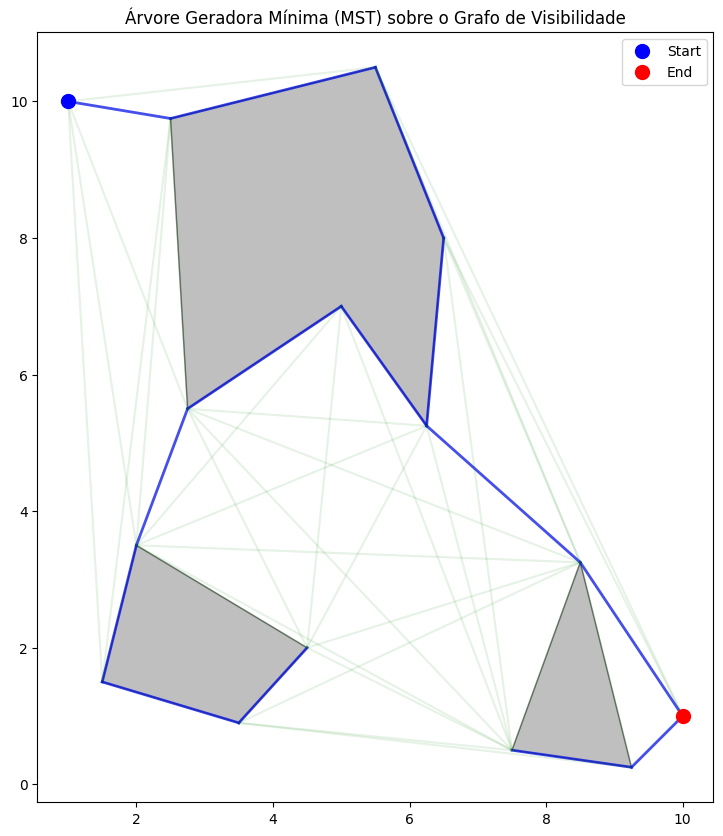

In [26]:
# Célula de código para o Passo 3: Kruskal (MST)

# Esta célula deve ser executada DEPOIS da célula anterior (que gera o grafo_vis)

# 3. Implementar Kruskal ou Prim no grafo de visibilidade.
print("\n--- Passo 3: Gerando a Árvore Geradora Mínima (MST) ---")

# Usamos a função nativa do networkx para encontrar a MST
# O 'algorithm' pode ser 'kruskal' ou 'prim'. Vamos usar Kruskal.
try:
    mst = nx.minimum_spanning_tree(grafo_vis, algorithm='kruskal')
    print(f"MST (Kruskal) gerada com {mst.number_of_nodes()} nós e {mst.number_of_edges()} arestas.")

    # 7. Plotar o caminho gerado no mapa (Passo 6 melhorado para ver a MST)
    print("Plotando a MST...")
    fig, ax = plt.subplots(figsize=(10, 10))

    # Desenha os obstáculos
    for poly in obst:
        x, y = poly.exterior.xy
        ax.fill(x, y, alpha=0.5, fc='gray', ec='black')

    # Desenha as arestas da MST (em azul)
    for u, v in mst.edges():
        ax.plot([u[0], v[0]], [u[1], v[1]], 'b-', alpha=0.7, linewidth=2)

    # Desenha o grafo de visibilidade completo (em verde, suave) por baixo
    for u, v in grafo_vis.edges():
        ax.plot([u[0], v[0]], [u[1], v[1]], 'g-', alpha=0.1)

    # Ponto Inicial e Final
    ax.plot(start[0], start[1], 'bo', markersize=10, label='Start')
    ax.plot(end[0], end[1], 'ro', markersize=10, label='End')

    ax.set_aspect('equal')
    plt.legend()
    plt.title("Árvore Geradora Mínima (MST) sobre o Grafo de Visibilidade")
    plt.show()

except Exception as e:
    print(f"Erro ao gerar MST: {e}")
    print("Verifique se o grafo_vis foi gerado corretamente na célula anterior.")


--- Teste do Passo 4 ---
Posição de teste inicial (igual ao 'Start'): (1.0, 10.0)
Vértice da MST mais próximo encontrado:      (np.float64(1.0), np.float64(10.0))

Posição de teste final (igual ao 'End'):   (10.0, 1.0)
Vértice da MST mais próximo encontrado:      (np.float64(10.0), np.float64(1.0))


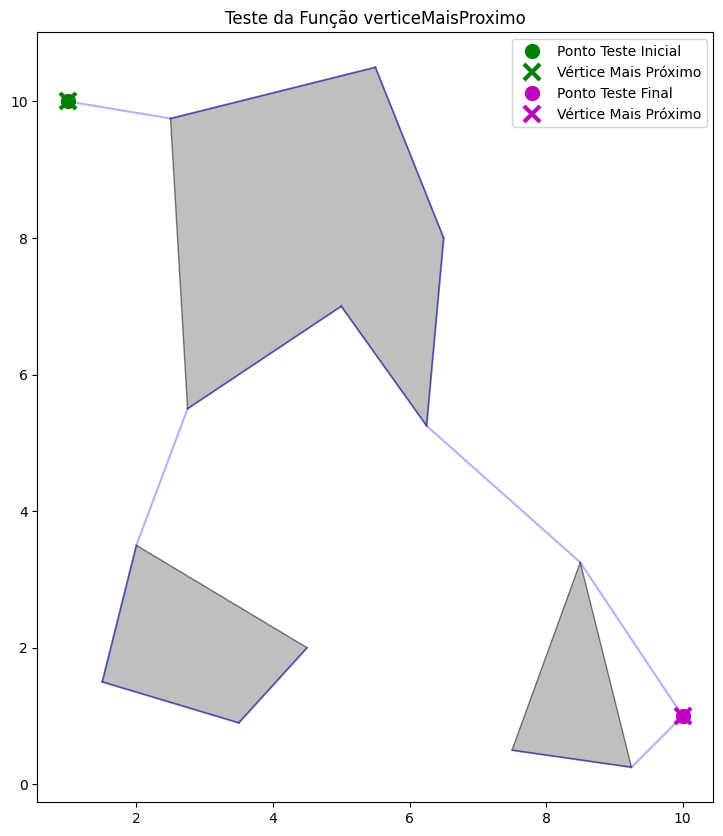

In [27]:
# É necessário importar a biblioteca numpy para cálculos de distância eficientes
import numpy as np

# 4. Implementação da função verticeMaisProximo.
# Recebe uma posição e a árvore (mst) e retorna o vértice da árvore mais próximo.

def verticeMaisProximo(posicao, arvore):
    """
    Encontra o vértice (nó) na árvore 'arvore' mais próximo da 'posicao'.

    Argumentos:
     posicao (tuple): Uma tupla (x, y) representando a posição atual.
     arvore (nx.Graph): O grafo (ou MST) networkx.

    Retorna:
     tuple: O vértice (x, y) mais próximo que existe na árvore.
    """

    # Pega a lista de todos os nós (vértices) da árvore
    # Convertemos para um array numpy para facilitar o cálculo de distância
    try:
        nos_da_arvore = np.array(list(arvore.nodes()))
    except Exception as e:
        print(f"Erro ao obter nós da árvore: {e}. A árvore é válida?")
        return None

    # Converte a posição de entrada para numpy
    ponto = np.array(posicao)

    # Calcula a distância euclidiana ao quadrado de 'ponto' para todos os 'nos_da_arvore'
    # (Não precisamos da raiz quadrada para achar o mínimo, economiza processamento)
    distancias_sq = np.sum((nos_da_arvore - ponto)**2, axis=1)

    # Encontra o índice (a posição na lista) do nó com a menor distância
    indice_mais_proximo = np.argmin(distancias_sq)

    # Retorna o vértice (coordenada) correspondente a esse índice
    return tuple(nos_da_arvore[indice_mais_proximo])

# --- Célula de Teste para o Passo 4 ---
# Vamos testar a função com um ponto aleatório e ver o resultado
# (Execute esta célula DEPOIS da célula que define a função acima)

# Verifica se a MST ('mst') e os obstáculos ('obst') existem no ambiente
if 'mst' in locals() and 'obst' in locals() and 'start' in locals():
    # Usamos os pontos originais start/end para o teste
    # Assim, a função deve retornar eles mesmos, provando que funciona.
    ponto_teste_inicial = start
    ponto_teste_final = end

    vertice_prox_inicial = verticeMaisProximo(ponto_teste_inicial, mst)
    vertice_prox_final = verticeMaisProximo(ponto_teste_final, mst)

    print(f"\n--- Teste do Passo 4 ---")
    print(f"Posição de teste inicial (igual ao 'Start'): {ponto_teste_inicial}")
    print(f"Vértice da MST mais próximo encontrado:      {vertice_prox_inicial}")

    print(f"\nPosição de teste final (igual ao 'End'):   {ponto_teste_final}")
    print(f"Vértice da MST mais próximo encontrado:      {vertice_prox_final}")

    # Plotar para verificar
    fig, ax = plt.subplots(figsize=(10, 10))
    for poly in obst:
        x, y = poly.exterior.xy
        ax.fill(x, y, alpha=0.5, fc='gray', ec='black')
    for u, v in mst.edges():
        ax.plot([u[0], v[0]], [u[1], v[1]], 'b-', alpha=0.3)

    # Pontos de teste e seus vértices mais próximos
    # Como os pontos de teste SÃO os vértices, o 'o' e o 'x' devem se sobrepor
    ax.plot(ponto_teste_inicial[0], ponto_teste_inicial[1], 'go', markersize=10, label='Ponto Teste Inicial')
    ax.plot(vertice_prox_inicial[0], vertice_prox_inicial[1], 'gx', markersize=12, mew=3, label='Vértice Mais Próximo')

    ax.plot(ponto_teste_final[0], ponto_teste_final[1], 'mo', markersize=10, label='Ponto Teste Final')
    ax.plot(vertice_prox_final[0], vertice_prox_final[1], 'mx', markersize=12, mew=3, label='Vértice Mais Próximo')

    ax.set_aspect('equal')
    plt.legend()
    plt.title("Teste da Função verticeMaisProximo")
    plt.show()

else:
    print("Execute as células anteriores primeiro para gerar a 'mst', 'obst' e 'start'.")


--- Teste dos Passos 5 e 6 ---
Buscando caminho de (1.0, 10.0) para (10.0, 1.0)...
Caminho encontrado com 7 vértices.
Plotando o caminho...
Imagem 'caminho_mst.png' salva.


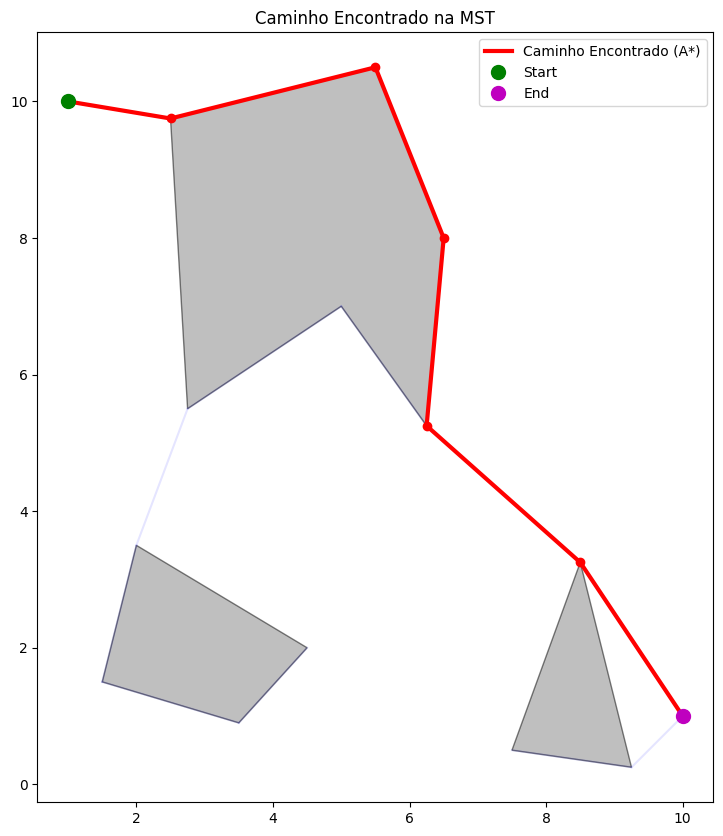

In [28]:
# É necessário importar a biblioteca numpy para cálculos de distância eficientes
import numpy as np
import networkx as nx
import math
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, LineString # Importa o que faltava para o plot

# 5. Implementação da função de busca na árvore (BFS/DFS/A*).
# Como a MST é uma árvore, só existe UM caminho simples entre quaisquer dois nós.
# Vamos usar o A* (sugerido na prática) para encontrar o caminho.

def encontrar_caminho_na_arvore(vertice_inicial, vertice_final, arvore_mst):

    # --- Robustez para Tipos de Dado ---
    # A célula anterior (verticeMaisProximo) pode retornar tuplas de (np.float64, np.float64)
    # mas os nós do grafo são (float, float). Esta seção "encaixa" a entrada
    # ao nó exato do grafo com o tipo de dado correto.

    try:
        lista_nos = list(arvore_mst.nodes())
        if not lista_nos:
            print("Erro: A árvore não tem nós.")
            return None

        nos_np = np.array(lista_nos)

        # Encontra o NÓ REAL mais próximo para o VÉRTICE INICIAL
        ponto_inicial_np = np.array(vertice_inicial)
        dist_sq_ini = np.sum((nos_np - ponto_inicial_np)**2, axis=1)
        no_inicial = lista_nos[np.argmin(dist_sq_ini)]

        # Encontra o NÓ REAL mais próximo para o VÉRTICE FINAL
        ponto_final_np = np.array(vertice_final)
        dist_sq_fin = np.sum((nos_np - ponto_final_np)**2, axis=1)
        no_final = lista_nos[np.argmin(dist_sq_fin)]

    except Exception as e:
        print(f"Erro ao processar nós da árvore: {e}")
        return None

    # ------------------------------------

    # Heurística para o A* (distância Euclidiana)
    def heuristic_dist(a, b):
        return math.dist(a, b)

    try:
        # Usamos A* com a distância euclidiana como heurística
        # e o 'weight' da aresta como custo real.
        caminho = nx.astar_path(arvore_mst,
                                source=no_inicial,
                                target=no_final,
                                heuristic=heuristic_dist,
                                weight='weight')
        return caminho
    except nx.NetworkXNoPath:
        print(f"Não foi encontrado caminho entre {no_inicial} e {no_final}.")
        return None
    except nx.NodeNotFound as e:
        print(f"Erro: {e}. Verifique se os vértices estão na árvore.")
        return None

# 6. Plotar o caminho gerado no mapa
def plotar_caminho(start_pos, end_pos, obstaculos, mst, caminho):
    """Função auxiliar para plotar o resultado final."""
    fig, ax = plt.subplots(figsize=(10, 10))

    # Desenha os obstáculos
    for poly in obstaculos:
        x, y = poly.exterior.xy
        ax.fill(x, y, alpha=0.5, fc='gray', ec='black')

    # Desenha a MST (suave, em azul)
    for u, v in mst.edges():
        ax.plot([u[0], v[0]], [u[1], v[1]], 'b-', alpha=0.1)

    # Desenha o caminho encontrado (em vermelho, destacado)
    if caminho:
        px, py = zip(*caminho)
        ax.plot(px, py, 'r-', linewidth=3, label='Caminho Encontrado (A*)')
        # Adiciona marcadores nos nós do caminho
        ax.plot(px, py, 'ro', markersize=6)

    # Ponto Inicial e Final
    ax.plot(start_pos[0], start_pos[1], 'go', markersize=10, label='Start')
    ax.plot(end_pos[0], end_pos[1], 'mo', markersize=10, label='End')

    ax.set_aspect('equal')
    plt.legend()
    plt.title("Caminho Encontrado na MST")
    plt.savefig("caminho_mst.png") # Salva a imagem
    print("Imagem 'caminho_mst.png' salva.")
    plt.show()

# --- Célula de Teste para o Passo 5 e 6 ---
# (Execute esta célula DEPOIS das células anteriores)

if 'mst' in locals() and 'start' in locals() and 'end' in locals() and 'obst' in locals():
    print("\n--- Teste dos Passos 5 e 6 ---")

    # Os vértices inicial e final SÃO os pontos start/end do mapa.txt
    v_start = start
    v_end = end

    print(f"Buscando caminho de {v_start} para {v_end}...")
    caminho_mst = encontrar_caminho_na_arvore(v_start, v_end, mst)

    if caminho_mst:
        print(f"Caminho encontrado com {len(caminho_mst)} vértices.")

        # Plotar o caminho
        print("Plotando o caminho...")
        plotar_caminho(start, end, obst, mst, caminho_mst)
    else:
        print("Não foi possível encontrar o caminho.")
else:
    print("Execute as células anteriores primeiro para gerar 'mst', 'start', 'end' e 'obst'.")